In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() # Loading data 

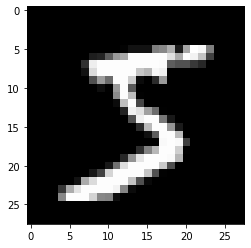

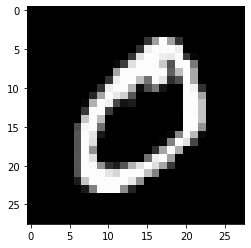

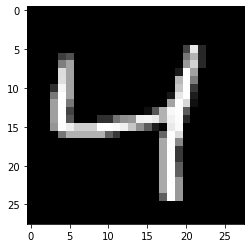

In [3]:
n_images = 3
for i in range(n_images):
    plt.imshow(np.reshape(x_train[i], [28, 28]), cmap='gray')
    plt.show() # Displaing few instances of the dataset

In [4]:
n_c = 10 # Number of classes: 0-9 digits
n_f = 784 # Number of features: 28*28

learning_rate = 0.3 # Setting learning rate

n_h = 800 # Number of neurons in first hidden layer

In [5]:
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32) # Converting to float32

x_train, x_test = x_train.reshape([-1, n_f]), x_test.reshape([-1, n_f]) # reshaping data into 1-D vector of 784 features

x_train, x_test = x_train / 255., x_test / 255. # Normalising values to 0-1

In [6]:
x_train.shape

(60000, 784)

In [7]:
x_train = x_train.T
y_train = y_train.T

In [8]:
print(x_train.shape)
print(y_train.shape)

(784, 60000)
(60000,)


In [9]:
train_label=np.zeros((10,60000))

for col in range (60000):
    val = y_train[col]
    for row in range (10):
        if (val == row):
            train_label[val, col]=1

In [10]:
y_train = y_train.reshape(60000,1)

In [11]:
def initialize_parameters(n_x, n_h, n_y):
  
    w1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    
    w2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters


In [12]:
def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

In [13]:
def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

In [14]:
def forward_prop(x, parameters):

    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = np.dot(w1, x) + b1
    a1 = relu(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)

    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }

    return forward_cache

In [15]:
def cost_function(a2, y):
    m = y.shape[0]
    
    cost = -(1/m)*np.sum(y*np.log(a2))
   
    return cost

In [16]:
def backward_prop(x, y, parameters, forward_cache):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_relu(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients

In [17]:
def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

In [18]:
def model(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_prop(x, parameters)
        
        cost = cost_function(forward_cache['a2'], y)
        
        gradients = backward_prop(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list

In [19]:
iterations = 200
parameters, Cost_list = model(x_train, train_label, n_h=n_h, learning_rate = learning_rate, iterations = iterations)

Cost after 0 iterations is : 13821.785180404375
Cost after 20 iterations is : 12780.391175738956
Cost after 40 iterations is : 11864.723329816807
Cost after 60 iterations is : 11055.504313227842
Cost after 80 iterations is : 10343.12886956576
Cost after 100 iterations is : 9717.074485027433
Cost after 120 iterations is : 9166.721528068645
Cost after 140 iterations is : 8682.05359676124
Cost after 160 iterations is : 8254.017889675246
Cost after 180 iterations is : 7874.653744182333


In [20]:
y_test.shape

(10000,)

In [21]:
x_test = x_test.T

In [22]:
test_label=np.zeros((10,10000))

for col in range (10000):
    val = y_test[col]
    for row in range (10):
        if (val == row):
            test_label[val, col]=1

In [23]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_prop(inp, parameters)
    
    a_out = forward_cache['a2']   
    a_out = np.argmax(a_out, 0) 
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

In [24]:
print("Accuracy of Train Dataset", accuracy(x_train, train_label, parameters), "%")

Accuracy of Train Dataset 81.36833333333333 %


In [25]:
print("Accuracy of Test Dataset", accuracy(x_test, test_label, parameters), "%")

Accuracy of Test Dataset 82.37 %
